<a href="https://colab.research.google.com/github/RosarioH10062002/connectivity-biomarkers-pd-depression/blob/main/ISP_Participants.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**LIBRARIES**

In [138]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Obtain Participants

## Dataset Curation Criteria

To ensure acquisition homogeneity, the following inclusion criteria were applied:

- Manufacturer: Siemens  
- Field strength: 3T  
- Modality: fMRI  
- Acquisition: rsfMRI_RL  
- Visit: Baseline only  
- One scan per subject  

These criteria were applied prior to all connectivity and statistical analyses.


In [139]:
csv_path = "/content/drive/MyDrive/M2/Impact Scholar Programme/Final_dataset_participants.csv"
df = pd.read_csv(csv_path, sep = ",")
df.head(4)
#df.shape

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
0,I1526359,100005,PD,M,53,BL,fMRI,rsfMRI_RL,Original,1/27/2021,DCM,NaN
1,I1526360,100005,PD,M,53,BL,fMRI,rsfMRI_L_R,Original,1/27/2021,DCM,NaN
2,I1526375,100006,PD,F,56,BL,fMRI,rsfMRI_RL,Original,12/16/2020,DCM,NaN
3,I1526376,100006,PD,F,56,BL,fMRI,rsfMRI_L_R,Original,12/16/2020,DCM,NaN


In [140]:
# Keep only consistent rs-fMRI RL acquisitions
keep_desc = ["rsfMRI_RL"]
df = df[df["Description"].isin(keep_desc)].copy()

pd_subjects = (
    df[df["Group"] == "PD"]["Subject"]
    .drop_duplicates()
    .head(6)
)

ctrl_subjects = (
    df[df["Group"] == "Control"]["Subject"]
    .drop_duplicates()
    .head(7)
)

selected_subjects = list(pd_subjects) + list(ctrl_subjects)

subset = df[df["Subject"].isin(selected_subjects)].copy()

# Keep only one scan per subject
subset = subset.sort_values("Description").drop_duplicates("Subject")

subset.to_csv("participants_subset.csv", index=False)

print("Total subjects:", subset["Subject"].nunique())
print(subset["Group"].value_counts())
print(subset["Description"].value_counts())


Total subjects: 13
Group
Control    7
PD         6
Name: count, dtype: int64
Description
rsfMRI_RL    13
Name: count, dtype: int64


In [141]:
pd_subjects, ctrl_subjects

(0     100005
 2     100006
 4     100007
 7     100018
 9     100267
 10    100268
 Name: Subject, dtype: int64,
 19     100890
 56     101195
 116    102447
 124    103161
 126    103183
 129    103467
 130    103542
 Name: Subject, dtype: int64)

#DATA LOADING


In [142]:
path = "/content/drive/My Drive/M2/Impact Scholar Programme/dataset_correct.csv" # dataset extracted from the ppmi website
dataset_complete = pd.read_csv(path, sep = ",")

In [143]:
dataset_complete.head(5)

,Subject ID,Sex,Weight,Research Group,Visit,Archive Date,Study Date,Age,GDSCALE Total Score,Modality,Description,Type,Imaging Protocol,Image ID,Structure,Tissue,Laterality,Image Type,Registration
0,100005,M,69.0,PD,Baseline,12/14/2021,1/27/2021,52.8,0.0,fMRI,rsfMRI_RL,Original,Field Strength=3.0;TE=30.0;Manufacturer=SIEMEN...,1526359,Brain,All,Both,NaN,native
1,100005,M,69.0,PD,Baseline,12/14/2021,1/27/2021,52.8,0.0,fMRI,rsfMRI_L_R,Original,Field Strength=3.0;TE=30.0;Manufacturer=SIEMEN...,1526360,Brain,All,Both,NaN,native
2,100006,F,109.0,PD,Baseline,12/14/2021,12/16/2020,55.7,2.0,fMRI,rsfMRI_RL,Original,Field Strength=3.0;TE=30.0;Manufacturer=SIEMEN...,1526375,Brain,All,Both,NaN,native
3,100006,F,109.0,PD,Baseline,12/14/2021,12/16/2020,55.7,2.0,fMRI,rsfMRI_L_R,Original,Field Strength=3.0;TE=30.0;Manufacturer=SIEMEN...,1526376,Brain,All,Both,NaN,native
4,100007,M,73.0,PD,Baseline,12/13/2021,12/09/2020,67.2,0.0,fMRI,rsfMRI_RL,Original,Field Strength=3.0;TE=30.0;Manufacturer=SIEMEN...,1525726,Brain,All,Both,NaN,native


## Dataset Curation Criteria for the first bunch of participants

To ensure acquisition homogeneity, the following inclusion criteria were applied:

- Manufacturer: Siemens  
- Field strength: 3T  
- Modality: fMRI  
- Acquisition: rsfMRI_RL  
- Visit: Baseline only  
- One scan per subject  

These criteria were applied prior to all connectivity and statistical analyses.

In [144]:
siemens_mask = dataset_complete["Imaging Protocol"] == "Field Strength=3.0;TE=30.0;Manufacturer=SIEMENS;Slice Thickness=3.5;TR=2500.0"
df_siemens = dataset_complete[siemens_mask].copy()

rl_mask = df_siemens["Description"] == "rsfMRI_RL"
df_rl = df_siemens[rl_mask].copy()
df_rl = df_rl.dropna(subset=["GDSCALE Total Score"])

print(f"Dataset Siemens: {df_siemens.shape}, Dataset Siemens RL: {df_rl.shape}")

Dataset Siemens: (462, 19), Dataset Siemens RL: (144, 19)


In [145]:
path_save = Path("/content/drive/MyDrive/M2/Impact Scholar Programme/")
df_rl.to_csv(path_save/"filtered_list.csv", index=False)

In [146]:
df_rl.head(20)

,Subject ID,Sex,Weight,Research Group,Visit,Archive Date,Study Date,Age,GDSCALE Total Score,Modality,Description,Type,Imaging Protocol,Image ID,Structure,Tissue,Laterality,Image Type,Registration
0,100005,M,69.0,PD,Baseline,12/14/2021,1/27/2021,52.8,0.0,fMRI,rsfMRI_RL,Original,Field Strength=3.0;TE=30.0;Manufacturer=SIEMEN...,1526359,Brain,All,Both,NaN,native
2,100006,F,109.0,PD,Baseline,12/14/2021,12/16/2020,55.7,2.0,fMRI,rsfMRI_RL,Original,Field Strength=3.0;TE=30.0;Manufacturer=SIEMEN...,1526375,Brain,All,Both,NaN,native
4,100007,M,73.0,PD,Baseline,12/13/2021,12/09/2020,67.2,0.0,fMRI,rsfMRI_RL,Original,Field Strength=3.0;TE=30.0;Manufacturer=SIEMEN...,1525726,Brain,All,Both,NaN,native
7,100018,F,63.4,PD,Baseline,9/28/2021,2/02/2021,69.7,5.0,fMRI,rsfMRI_RL,Original,Field Strength=3.0;TE=30.0;Manufacturer=SIEMEN...,1497580,Brain,All,Both,NaN,native
9,100267,M,81.7,PD,Baseline,9/28/2021,2/19/2021,53.6,6.0,fMRI,rsfMRI_RL,Original,Field Strength=3.0;TE=30.0;Manufacturer=SIEMEN...,1497592,Brain,All,Both,NaN,native
10,100268,F,71.8,PD,Baseline,9/28/2021,5/24/2021,72.5,0.0,fMRI,rsfMRI_RL,Original,Field Strength=3.0;TE=30.0;Manufacturer=SIEMEN...,1497603,Brain,All,Both,NaN,native
13,100842,M,77.7,PD,Baseline,9/13/2021,3/29/2021,63.9,5.0,fMRI,rsfMRI_RL,Original,Field Strength=3.0;TE=30.0;Manufacturer=SIEMEN...,1491215,Brain,All,Both,NaN,native
20,101018,M,78.1,PD,Baseline,9/24/2021,4/12/2021,62.3,1.0,fMRI,rsfMRI_RL,Original,Field Strength=3.0;TE=30.0;Manufacturer=SIEMEN...,1496226,Brain,All,Both,NaN,native
24,101025,F,63.0,PD,Baseline,9/30/2021,6/23/2021,73.9,2.0,fMRI,rsfMRI_RL,Original,Field Strength=3.0;TE=30.0;Manufacturer=SIEMEN...,1498686,Brain,All,Both,NaN,native
29,101026,M,80.0,PD,Baseline,9/30/2021,6/11/2021,46.1,2.0,fMRI,rsfMRI_RL,Original,Field Strength=3.0;TE=30.0;Manufacturer=SIEMEN...,1498723,Brain,All,Both,NaN,native


In [147]:
#@title Metrics
pd_depressed_list_siemens = df_rl[(df_rl["GDSCALE Total Score"]>= 5)  &  (df_rl["Research Group"] == "PD")]
pd_non_depressed_list_siemens = df_rl[(df_rl["GDSCALE Total Score"]< 5)  &  (df_rl["Research Group"] == "PD")]
print(f"Number of depressed PD: {pd_depressed_list_siemens.shape}; Number of non-depressed PD: {pd_non_depressed_list_siemens.shape}")

control_depressed_list_siemens = df_rl[(df_rl["GDSCALE Total Score"]>= 5)  &  (df_rl["Research Group"] == "Control")]
control_non_depressed_list_siemens = df_rl[(df_rl["GDSCALE Total Score"]< 5)  &  (df_rl["Research Group"] == "Control")]
print(f"Number of depressed Control: {control_depressed_list_siemens.shape}; Number of non-depressed Control: {control_non_depressed_list_siemens.shape}")


Number of depressed PD: (17, 19); Number of non-depressed PD: (108, 19)
Number of depressed Control: (0, 19); Number of non-depressed Control: (19, 19)


In [148]:
#@title PD DEPRESSED LIST
list_pd_depressed = pd_depressed_list_siemens.sort_values(by="GDSCALE Total Score", ascending=False)[["Subject ID", "GDSCALE Total Score"]]
list_pd_depressed

,Subject ID,GDSCALE Total Score
498,182427,12.0
36,101050,11.0
507,184432,10.0
461,174141,8.0
538,219411,7.0
268,139859,7.0
122,102978,7.0
439,172260,6.0
9,100267,6.0
7,100018,5.0


In [149]:
#@title PD NON DEPRESSED LIST
list_pd_non_depressed = pd_non_depressed_list_siemens.sort_values(by="GDSCALE Total Score", ascending=False)[["Subject ID", "GDSCALE Total Score"]]
list_pd_non_depressed

,Subject ID,GDSCALE Total Score
46,101146,4.0
41,101070,4.0
140,107648,4.0
147,109451,4.0
165,111545,4.0
...,...,...
396,160040,0.0
383,157229,0.0
471,174615,0.0
481,177395,0.0


In [150]:
#@title CONTROL DEPRESSED LIST
control_depressed_list_siemens.sort_values(by="GDSCALE Total Score", ascending=False)[["Subject ID", "GDSCALE Total Score"]].head(20)

,Subject ID,GDSCALE Total Score


In [151]:
#@title CONTROL NON DEPRESSED LIST
list_control_non_depressed = control_non_depressed_list_siemens.sort_values(by="GDSCALE Total Score", ascending=False)[["Subject ID", "GDSCALE Total Score"]]
list_control_non_depressed.head(20)

,Subject ID,GDSCALE Total Score
172,113050,3.0
341,149120,2.0
426,167746,2.0
415,165043,1.0
376,156484,1.0
124,103161,1.0
126,103183,1.0
346,149716,1.0
231,130028,1.0
191,115698,1.0


In [170]:
#@title ID participants we have used
pd_subjects = [
    100005, 100006, 100007, 102078, 100268, 101018,
    101146, 101174, 101476, 101479, 101735, 101742,
    101751, 101841, 102012, 102053]#, 102078, 102305,102321, 102420, 100018]
ctrl_subjects = [
    101195, 102447, 103161, 103183, 103467, 103542,
    108909, 113050, 115698,
    130028, 161329, 142086, 149120,
    149716, 156484, 160890]#, 161329, 165043, 167746,178413]

pd_subjects_dep = [
    100018, 100267, 100842, 101050, 102978, 133507,
    139859, 142879, 144131, 149116, 172260, 174141,
    182427, 184432, 211482, 219411
]

In [171]:
count = []
for index, row in list_pd_non_depressed.iterrows():
  for value in pd_subjects:
    if row["Subject ID"] == value:
      #print(f"Subject ID found: {value}")
      count.append(value)
print(f"Subject IDs found {len(count)}")

Subject IDs found 16


In [176]:
count = []
for index, row in list_control_non_depressed.iterrows():
  for value in ctrl_subjects:
    if row["Subject ID"] == value:
      #print(f"Subject ID found: {value}")
      count.append(value)
print(f"Subject IDs found {len(count)}")

Subject IDs found 16


In [175]:
count = []
for index, row in list_pd_depressed.iterrows():
  for value in pd_subjects_dep:
    if row["Subject ID"] == value:
      #print(f"Subject ID found: {value}")
      count.append(value)
print(f"Subject IDs found {len(count)}")

Subject IDs found 16


In [174]:
#df_rl.loc[df_rl["Subject ID"].isin(pd_subjects_dep)]

,Subject ID,Sex,Weight,Research Group,Visit,Archive Date,Study Date,Age,GDSCALE Total Score,Modality,Description,Type,Imaging Protocol,Image ID,Structure,Tissue,Laterality,Image Type,Registration
7,100018,F,63.4,PD,Baseline,9/28/2021,2/02/2021,69.7,5.0,fMRI,rsfMRI_RL,Original,Field Strength=3.0;TE=30.0;Manufacturer=SIEMEN...,1497580,Brain,All,Both,NaN,native
9,100267,M,81.7,PD,Baseline,9/28/2021,2/19/2021,53.6,6.0,fMRI,rsfMRI_RL,Original,Field Strength=3.0;TE=30.0;Manufacturer=SIEMEN...,1497592,Brain,All,Both,NaN,native
13,100842,M,77.7,PD,Baseline,9/13/2021,3/29/2021,63.9,5.0,fMRI,rsfMRI_RL,Original,Field Strength=3.0;TE=30.0;Manufacturer=SIEMEN...,1491215,Brain,All,Both,NaN,native
36,101050,F,55.2,PD,Baseline,9/13/2021,4/19/2021,49.7,11.0,fMRI,rsfMRI_RL,Original,Field Strength=3.0;TE=30.0;Manufacturer=SIEMEN...,1491225,Brain,All,Both,NaN,native
122,102978,F,60.0,PD,Baseline,9/30/2021,9/16/2021,54.7,7.0,fMRI,rsfMRI_RL,Original,Field Strength=3.0;TE=30.0;Manufacturer=SIEMEN...,1498864,Brain,All,Both,NaN,native
243,133507,M,77.0,PD,Baseline,2/25/2022,2/11/2022,66.5,5.0,fMRI,rsfMRI_RL,Original,Field Strength=3.0;TE=30.0;Manufacturer=SIEMEN...,1548879,Brain,All,Both,NaN,native
268,139859,M,70.0,PD,Baseline,5/17/2022,5/01/2022,56.9,7.0,fMRI,rsfMRI_RL,Original,Field Strength=3.0;TE=30.0;Manufacturer=SIEMEN...,1581557,Brain,All,Both,NaN,native
302,142879,F,72.0,PD,Baseline,3/29/2022,3/15/2022,80.5,5.0,fMRI,rsfMRI_RL,Original,Field Strength=3.0;TE=30.0;Manufacturer=SIEMEN...,1561867,Brain,All,Both,NaN,native
319,144131,M,90.0,PD,Baseline,7/06/2022,5/30/2022,63.9,5.0,fMRI,rsfMRI_RL,Original,Field Strength=3.0;TE=30.0;Manufacturer=SIEMEN...,1602697,Brain,All,Both,NaN,native
338,149116,M,82.2,PD,Baseline,7/27/2022,6/30/2022,41.9,5.0,fMRI,rsfMRI_RL,Original,Field Strength=3.0;TE=30.0;Manufacturer=SIEMEN...,1609376,Brain,All,Both,NaN,native


# Group Comparison of Depressive Symptoms (GDS)


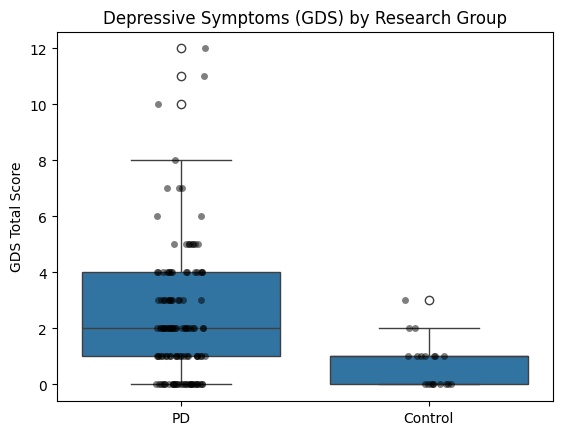

In [177]:
sns.boxplot(
    data=df_rl,
    x="Research Group",
    y="GDSCALE Total Score"
)
sns.stripplot(
    data=df_rl,
    x="Research Group",
    y="GDSCALE Total Score",
    color="black",
    alpha=0.5
)

plt.title("Depressive Symptoms (GDS) by Research Group")
plt.ylabel("GDS Total Score")
plt.xlabel("")

plt.show()



In [178]:
from scipy.stats import mannwhitneyu

pd_scores = df_rl.loc[df_rl["Research Group"]=="PD", "GDSCALE Total Score"].dropna()
ctrl_scores = df_rl.loc[df_rl["Research Group"]=="Control", "GDSCALE Total Score"].dropna()

u, p = mannwhitneyu(pd_scores, ctrl_scores, alternative="two-sided")
u, p # PD participants exhibited significantly higher depressive symptom severity than controls


(np.float64(1730.0), np.float64(0.001097877551414528))

In [179]:
def cliffs_delta(x, y):
    nx, ny = len(x), len(y)
    return (np.sum(x[:,None] > y) - np.sum(x[:,None] < y)) / (nx*ny)

delta = cliffs_delta(pd_scores.values, ctrl_scores.values)
delta # There is about a 46% higher probability that a randomly selected PD participant has a higher GDS score than a randomly selected control participant.

np.float64(0.4568421052631579)

## Confounder Screening

Potential confounding variables including age, weight, and sex were tested between
Parkinson’s disease and control groups.

Non-parametric tests were used due to sample size imbalance and non-normal distributions.
Age and sex were retained as covariates in subsequent neuroimaging analyses following
standard neuroimaging practice.



In [180]:
u, p = mannwhitneyu(
    df_rl.loc[df_rl["Research Group"]=="PD", "Age"].dropna(),
    df_rl.loc[df_rl["Research Group"]=="Control", "Age"].dropna()
)
u, p #No statistically significant age difference between PD and Control

(np.float64(1321.0), np.float64(0.432375798443276))

In [181]:
u, p = mannwhitneyu(
    df_rl.loc[df_rl["Research Group"]=="PD", "Weight"].dropna(),
    df_rl.loc[df_rl["Research Group"]=="Control", "Weight"].dropna()
)
u, p # No significant weight difference between PD and Control

(np.float64(1311.5), np.float64(0.4659247466295229))

In [182]:
from scipy.stats import fisher_exact

sex_table = pd.crosstab(
    df_rl["Sex"],
    df_rl["Research Group"]
)

fisher_exact(sex_table.values) # Sex distribution does not differ significantly between groups


SignificanceResult(statistic=np.float64(1.7297297297297298), pvalue=np.float64(0.2950469285915405))